<a href="https://colab.research.google.com/github/vs1991/Sentiment-Analysis-/blob/master/Amazon_Alexa_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('../Greyatom',force_remount=True)

Mounted at ../Greyatom


In [3]:
cd ../Greyatom/'My Drive'/'Data Science'/'Sentiment Analysis'

/Greyatom/My Drive/Data Science/Sentiment Analysis


In [4]:
ls

file.tsv  training.1600000.processed.noemoticon.csv


You are working in the amazon company as data scientist. They want you to focus on customer reviews on there alexa product. So your aim is to classify the unhappy customer based on the features 'rating', 'date', 'variation', 'verified_reviews', 'feedback'



1.   **rating**:Product ratings(1/2/3/4/5)

2.   **date**:Rating date
3.   **variation**:Product type
4.   **verified_reviews**:reviews given by customer
5.   **feedback**:feedback given by customer(0/1)
6. 



In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
data=pd.read_csv('file.tsv',sep ="\t")
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
data.shape

(3150, 5)

In [8]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [9]:
#converting datetime string type  to datetime type
data['date']=pd.to_datetime(data['date'])

In [10]:

#ength of each of the verified_reviews in it.
data['length']=data['verified_reviews'].apply(lambda x: len(x))

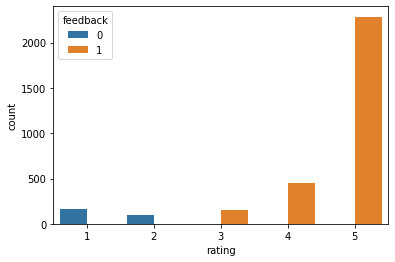

In [11]:
#ratings countplot

sns.countplot(x = 'rating', hue ='feedback',data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

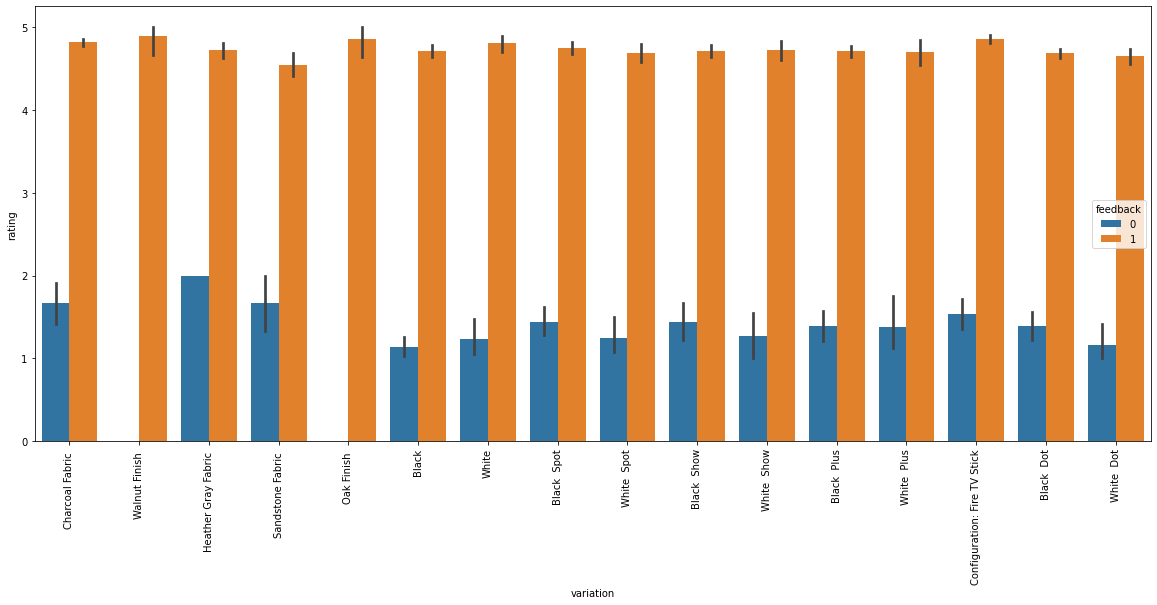

In [12]:
## Product rating vs feedback
plt.figure(figsize=(20,8))
sns.barplot(y='rating',x='variation',hue='feedback',data=data)
plt.xticks(rotation=90)

# Data Cleaning 

In [13]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [21]:
  >>> nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
corpus=[]
for i in range(0,3150):
  review=re.sub('[^a-zA-Z]'," ",data['verified_reviews'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=" ".join(review)
  corpus.append(review)


In [25]:
#splitting the dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [42]:
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data['feedback']


In [35]:
count=data['feedback'].value_counts()

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


In [52]:
rf=RandomForestClassifier(random_state=42)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
y_pred=rf.predict(X_test)


In [54]:
accuracy_score(y_test,y_pred)

0.9428571428571428

In [55]:
precision_score(y_test,y_pred)

0.944078947368421

In [60]:
confusion_matrix(y_test,y_pred)

array([[ 20,  34],
       [  2, 574]])

In [62]:
#as the class is highly imbalanced lets balance the data by using SMOTE
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [69]:
smote=SMOTE(random_state=9)
X_train,y_train=smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [70]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
y_pred=rf.predict(X_test)

In [76]:
score = accuracy_score(y_test, y_pred)


In [75]:
precision = precision_score(y_test, y_pred)


In [77]:
print(score, precision)

0.8841269841269841 0.9420035149384886
